<a href="https://colab.research.google.com/github/andresbasilea/Analizador-Financiero-CS/blob/main/AndresBasile_CreditSuisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Andrés José Basile Álvarez - Analizador De Estados Financieros

## Analizador de estados financieros de cualquier empresa.
### Se ingresa el nombre de la empresa y se hace web scraping en stockanalysis.com para obtener los estados financieros. A partir de ellos, se realiza un pequeño análisis.


###Fecha de realización: 26/09/21

In [2]:
!pip install beautifulsoup4
!pip install xlsxwriter

In [215]:
from bs4 import BeautifulSoup  # Web Scraping
import pandas as pd # Análisis de los datos
import matplotlib.pyplot as plt # Impresión de los datos (gráficas, ...)
import requests # Para obtener el contenido de la página web

In [18]:
#para descargar la hoja de cálculo generada
from google.colab import files

# ¡Bienvenido! 

### Ingresa el nombre de la empresa que deseas buscar: 




In [547]:
# Se permite al usuario ingresar una empresa (ejemplo: si se quiere Apple, se tiene que ingresar AAPL)
empresa = input()


IBM


In [548]:

# LAS DIRECCIONES WEB DONDE SE ENCUENTRA LA INFORMACIÓN DE LOS ESTADOS FINANCIEROS 
direcciones = {}
direcciones['Income Statement'] = f"https://stockanalysis.com/stocks/{empresa}/financials/"
direcciones['Balance Sheet'] = f"https://stockanalysis.com/stocks/{empresa}/financials/balance-sheet/"
direcciones['Cash Flow'] = f"https://stockanalysis.com/stocks/{empresa}/financials/cash-flow-statement/"
direcciones['Ratios'] = f"https://stockanalysis.com/stocks/{empresa}/financials/ratios/"




In [549]:
with pd.ExcelWriter('estadosFinancieros' + empresa +'.xlsx',engine='xlsxwriter') as escritor: # Creación de una hoja de cálculo para exportar datos
    
    # para manejar cada DF por separado posteriormente.
    df = []
    dfIncome = pd.DataFrame()
    dfBalance = pd.DataFrame()
    dfCash = pd.DataFrame()
    dfRatios = pd.DataFrame()

    df.append(dfIncome)
    df.append(dfBalance)
    df.append(dfCash)
    df.append(dfRatios)

    



    i=0
    for estadoFinanciero in direcciones: #Ciclo for para traer los datos de cada tabla y guardarlos en excel
      datos = requests.get(direcciones[estadoFinanciero])
      soup = BeautifulSoup(datos.content, 'html.parser')
      df[i] = pd.read_html(str(soup),attrs={'id':'financial-table'})[0]
      df[i].index=df[i].index+1
      df[i]=df[i].rename(columns={'Year':'Concepto/Año'})
      df[i].to_excel(escritor, sheet_name=estadoFinanciero)
      i+=1


files.download('estadosFinancieros' + empresa +'.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análisis y reporte de datos obtenidos


## Estados Financieros:

In [550]:
print("\n\n\n\nIncome Statement")
df[0]






Income Statement


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Revenue,73620,77147,79591,79139,79919,81741,92793,98367,102874,106916
2,Revenue Growth,-4.57%,-3.07%,0.57%,-0.98%,-2.23%,-11.91%,-5.67%,-4.38%,-3.78%,-
3,Cost of Revenue,38046,40659,42655,42196,41403,41057,46386,49683,52513,56778
4,Gross Profit,35574,36488,36936,36943,38516,40684,46407,48684,50361,50138
5,"Selling, General & Admin",23082,20604,19366,19680,20869,20430,23180,23451,23463,23594
6,Research & Development,6333,5989,5379,5590,5726,5247,5437,5743,5816,6258
7,Other Operating Expenses,235,-1616,126,-341,-1038,-1406,-2680,-1155,-1917,-1128
8,Operating Expenses,29650,24977,24871,24929,25557,24271,25937,28039,27362,28724
9,Operating Income,5924,11511,12065,12014,12959,16413,20470,20645,22999,21414
10,Interest Expense / Income,1288,1344,723,615,630,468,484,402,459,411


In [551]:
print("\n\n\n\n Balance Sheet")

df[1]





 Balance Sheet


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Cash & Equivalents,13675,8313,11604,12234,7826,7686,8476,10716,10412,11922
2,Short-Term Investments,600,696,618,608,701,508,0,350,717,0
3,Cash & Cash Equivalents,14275,9009,12222,12842,8527,8194,8476,11066,11129,11922
4,Cash Growth,58.45%,-26.29%,-4.83%,50.60%,4.06%,-3.33%,-23.41%,-0.57%,-6.65%,-
5,Receivables,25824,32507,39711,41180,38266,38567,42940,44591,43390,40337
6,Inventory,1839,1619,1682,1583,1553,1551,2103,2310,2287,2595
7,Other Current Assets,-2773,-4715,-4469,-5870,-4458,-5808,-6142,-6617,-7373,-3926
8,Total Current Assets,39165,38420,49146,49735,43888,42504,47377,51350,49433,50928
9,"Property, Plant & Equipment",14726,15006,10792,11116,10830,10727,10771,13821,13996,13883
10,Long-Term Investments,2282,2074,2386,2783,4585,5187,5520,4639,5021,4895


In [552]:
print("\n\n\n\nCash Flow")
df[2]






Cash Flow


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Net Income,5590,9431,8728,5753,11872,13190,12022,16483,16604,15855
2,Depreciation & Amortization,6695,6059,4480,4541,4381,3855,4492,4678,4676,4815
3,Share-Based Compensation,937,679,510,534,544,468,512,614,688,697
4,Other Operating Activities,4975,-1399,1529,5896,287,-258,-158,-4290,-2382,-1521
5,Operating Cash Flow,18197,14770,15247,16724,17084,17255,16868,17485,19586,19846
6,Operating Cash Flow Growth,23.20%,-3.13%,-8.83%,-2.11%,-0.99%,2.29%,-3.53%,-10.73%,-1.31%,-
7,Capital Expenditures,-3042,-2370,-3716,-3313,-3726,-3781,-3779,-3768,-4307,-4059
8,Acquisitions,167,-31554,-139,-701,-6150,-3750,1701,-2759,-3123,-1797
9,Change in Investments,-153,6988,-1057,-3067,-1052,-629,-923,-798,-1575,1460
10,Other Investing Activities,0,0,-1,0,0,1,0,-1,1,0


In [553]:
print("\n\n\n\nRatios")

df[3]






Ratios


,Concepto/Año,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
1,Market Capitalization,112166,118711,103303,142035,157832,133507,158781,203674,216439,216724
2,Market Cap Growth,-5.51%,14.92%,-27.27%,-10.01%,18.22%,-15.92%,-22.04%,-5.90%,-0.13%,-
3,Enterprise Value,167998,179980,138493,176746,191276,163687,194917,229782,238197,235581
4,PE Ratio,20.07,12.59,11.84,24.69,13.29,10.12,13.21,12.36,13.04,13.67
5,PS Ratio,1.52,1.54,1.30,1.79,1.98,1.63,1.71,2.07,2.10,2.03
6,PB Ratio,5.45,5.70,6.15,8.07,8.65,9.36,13.38,8.94,11.48,10.76
7,P/FCF Ratio,7.40,9.57,8.96,10.59,11.82,9.91,12.13,14.85,14.17,13.73
8,P/OCF Ratio,6.16,8.04,6.78,8.49,9.24,7.74,9.41,11.65,11.05,10.92
9,EV/Sales Ratio,2.28,2.33,1.74,2.23,2.39,2.00,2.10,2.34,2.32,2.20
10,EV/EBITDA Ratio,13.22,10.25,8.37,10.68,11.04,8.15,9.18,9.22,8.73,8.98


## Market Cap.

2011    216724.0
2012    216439.0
2013    203674.0
2014    158781.0
2015    133507.0
2016    157832.0
2017    142035.0
2018    103303.0
2019    118711.0
2020    112166.0
Name: 1, dtype: float64


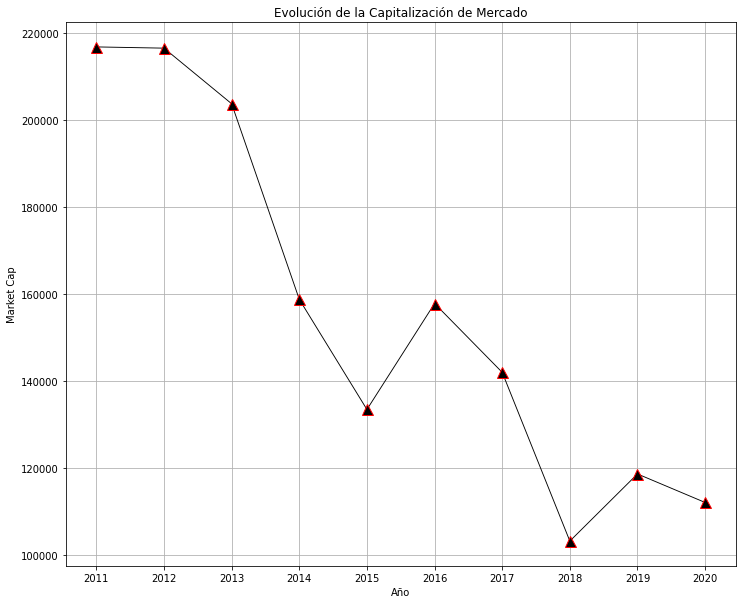

In [554]:
a = df[3].iloc[0,1:] #Información en RATIOS
a = a.astype(float)
a = a.iloc[::-1] #Cambiar el orden de los años para la gráfica
print(a[0:])
plt.figure(figsize=(12,10))
plt.title('Evolución de la Capitalización de Mercado')
plt.xlabel('Año')
plt.ylabel('Market Cap')
plt.grid(True)
plt.plot(a, linewidth=0.9, color='black', marker = '^', mec = "r", ms="11")


#Revenue Growth

[0.0, -3.78, -4.38, -5.67, -11.91, -2.23, -0.98, 0.57, -3.07, -4.57]


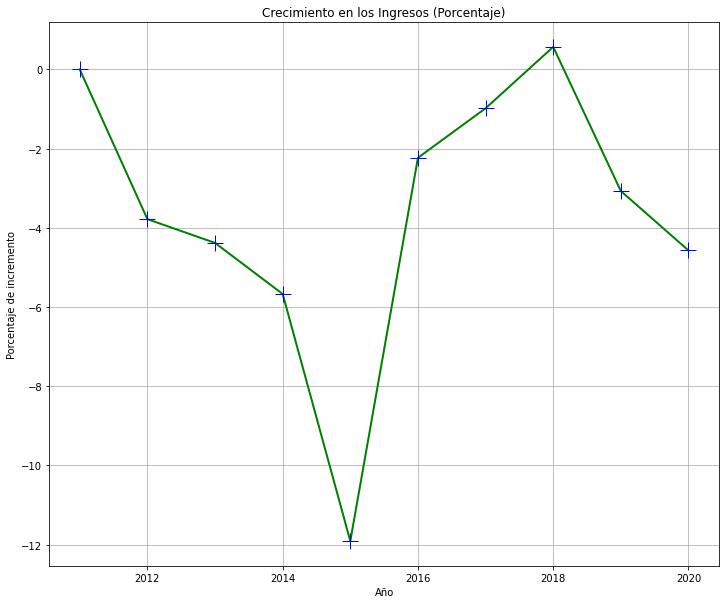

In [555]:
a = df[0].iloc[1,1:] # Ubicación de los datos en el estado financiero de Income Statement
a = a.iloc[::-1]
y = []
for x in a:
  if x == "-":
    x = "0" 
  x = x.rstrip("%")
  x = float(x)
  y.append(x)

anios = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] # Se hace esta tupla por si algún input de empresa no cuenta con todos los años (2011-2020)
print(y)
plt.figure(figsize=(12,10))
plt.title('Crecimiento en los Ingresos (Porcentaje)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de incremento')
plt.grid(True)
plt.plot(anios[0:len(y)],y, linewidth=2, color='green', marker = '+', mec = "b", ms="16")


#ROE, ROA, ROIC

ROE
 2020    0.98
2019    1.02
2018    1.29
2017    1.33
2016    1.21
2015    1.24
2014    1.20
2013    1.28
2012    1.13
2011    1.21
Name: 16, dtype: object 

ROA
 2020    27.20%
2019    51.70%
2018    47.70%
2017    31.10%
2016    72.00%
2015    98.80%
2014    80.00%
2013    82.90%
2012    81.40%
2011    71.90%
Name: 17, dtype: object 

ROIC
 2020     3.60%
2019     6.40%
2018     7.10%
2017     4.70%
2016    10.10%
2015    11.90%
2014    10.00%
2013    13.80%
2012    14.30%
2011    14.00%
Name: 18, dtype: object


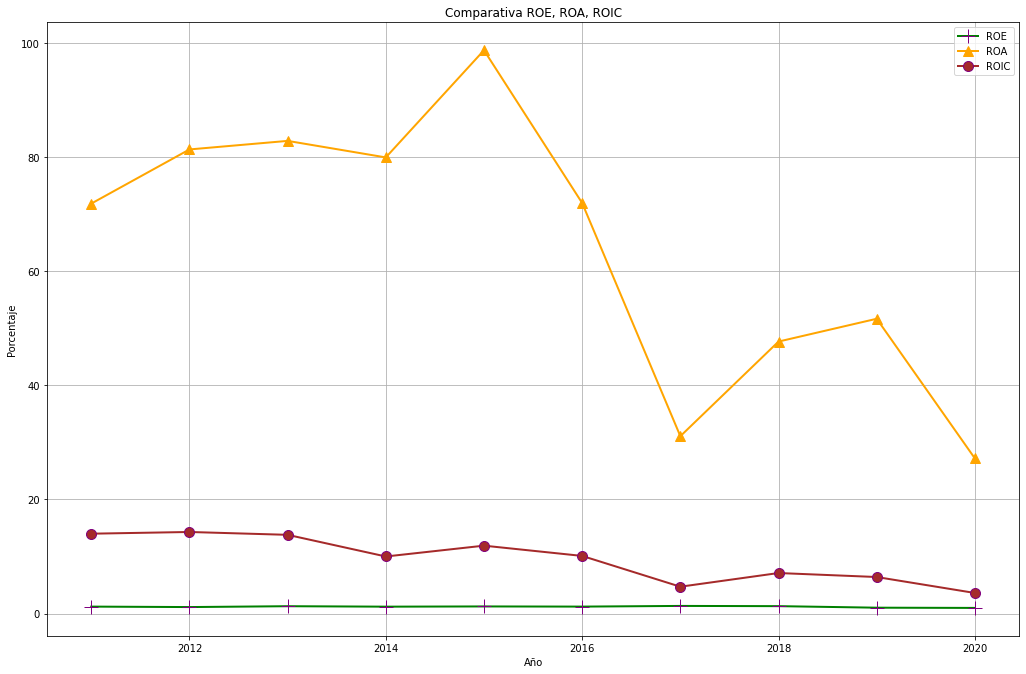

In [556]:
# Se ubican los datos en el dataframe
a = df[3].iloc[15,1:]
b = df[3].iloc[16,1:]
c = df[3].iloc[17,1:]

print("ROE\n",a, "\n\nROA\n",  b, "\n\nROIC\n", c)

a = a.iloc[::-1]
b = b.iloc[::-1]
c = c.iloc[::-1]

# Se limpian los datos del ROE.
x = []
for i in a:
  if i == "-":
    i = "0" 
  i = i.rstrip("%")
  i = float(i)
  x.append(i)

# Se limpian los datos del ROA.
y = []
for j in b:
  if j == "-":
    j = "0" 
  j = j.rstrip("%")
  j = float(j)
  y.append(j)

# Se limpian los datos del ROIC.
z = []
for k in c:
  if k == "-":
    k = "0" 
  k = k.rstrip("%")
  k = float(k)
  z.append(k)



anios = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] # Se hace este arreglo por si algún input de empresa no cuenta con todos los años (2011-2020)
plt.figure(figsize=(9,6))
plt.title('Comparativa ROE, ROA, ROIC')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.plot(anios[0:len(x)],x, linewidth=2, color='green', marker = '+', mec = "purple", ms="14")
plt.plot(anios[0:len(y)],y, linewidth=2, color='orange', marker = '^', mec = "orange", ms="10")
plt.plot(anios[0:len(z)],z, linewidth=2, color='brown', marker = 'o', mec = "purple", ms="10")
plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=1.6, hspace=0.6,wspace=0.3)
plt.legend(['ROE','ROA','ROIC'])